In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings 
warnings.filterwarnings("ignore", category = DeprecationWarning)
warnings.filterwarnings("ignore", category = FutureWarning)

In [119]:
df = pd.read_csv("./CC GENERAL.csv")
df.head() 

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

CUST_ID : Kredi Kartı sahibinin kimliği (Kategorik)

BALANCE : Alışveriş yapmak için hesaplarında kalan bakiye tutarı

BALANCE_FREQUENCY : Bakiye ne sıklıkta güncellenir, 0 ile 1 arasında puanlanır (1 = sık güncellenir, 0 = sık güncellenmez)

PURCHASES : Hesaptan yapılan alışveriş tutarı

ONEOFF_PURCHASES : Tek seferde yapılan maksimum alışveriş tutarı

INSTALLMENTS_PURCHASES : Taksitli olarak yapılan satın alma tutarı

CASH_ADVANCE : Kullanıcı tarafından verilen nakit avans

PURCHASES_FREQUENCY :Alımlar ne sıklıkta yapılıyor, 0 ile 1 arası puan (1) = sık satın alınır, 0 = sık satın alınmaz)

ONEOFFPURCHASESFREQUENCY : Tek seferde alışverişler ne sıklıkla yapılıyor (1 = sık sık satın alınır, 0 = sık satın alınmaz)

PURCHASESINSTALLMENTSFREQUENCY : Taksitli satın almalar ne sıklıkta yapılıyor (1 = sık sık yapılır, 0) = sık yapılmaz)

CASHADVANCEFREQUENCY : Nakit avans ödeme sıklığı

CASHADVANCETRX : "Avans Nakit" ile Yapılan İşlem Sayısı

PURCHASES_TRX : Yapılan satın alma işlem sayısı

CREDIT_LIMIT :Kullanıcıya ait Kredi Kartı Limiti

PAYMENTS : Kullanıcı tarafından yapılan Ödeme Tutarı

MINIMUM_PAYMENTS : Kullanıcı tarafından yapılan minimum ödeme tutarı

PRCFULLPAYMENT :  Kullanıcı tarafından ödenen tam ödemenin yüzdesi

TENURE : Kullanıcı için kredi kartı hizmetinin kullanım süresi

In [3]:
df.isnull().sum()  

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
df.loc[(df['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].mean()
df.loc[(df['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=df['CREDIT_LIMIT'].mean()  # eksik gözlemleri ortalama ile doldurdum.

In [7]:
df.isnull().sum() 

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [8]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [9]:
df.describe().T

count         mean          std        min  \
BALANCE                           8950.0  1564.474828  2081.531879   0.000000   
BALANCE_FREQUENCY                 8950.0     0.877271     0.236904   0.000000   
PURCHASES                         8950.0  1003.204834  2136.634782   0.000000   
ONEOFF_PURCHASES                  8950.0   592.437371  1659.887917   0.000000   
INSTALLMENTS_PURCHASES            8950.0   411.067645   904.338115   0.000000   
CASH_ADVANCE                      8950.0   978.871112  2097.163877   0.000000   
PURCHASES_FREQUENCY               8950.0     0.490351     0.401371   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8950.0     0.202458     0.298336   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0     0.364437     0.397448   0.000000   
CASH_ADVANCE_FREQUENCY            8950.0     0.135144     0.200121   0.000000   
CASH_ADVANCE_TRX                  8950.0     3.248827     6.824647   0.000000   
PURCHASES_TRX                     8950.0    14.709832    24.857649   0.000000   
CREDIT_LIMIT                      8950.0  4494.449450  3638.612411  50.000000   
PAYMENTS                          8950.0  1733.143852  2895.063757   0.000000   
MINIMUM_PAYMENTS                  8950.0   864.206542  2330.588021   0.019163   
PRC_FULL_PAYMENT                  8950.0     0.153715     0.292499   0.000000   
TENURE                            8950.0    11.517318     1.338331   6.000000   

                                          25%          50%          75%  \
BALANCE                            128.281915   873.385231  2054.140036   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.635000   361.280000  1110.130000   
ONEOFF_PURCHASES                     0.000000    38.000000   577.405000   
INSTALLMENTS_PURCHASES               0.000000    89.000000   468.637500   
CASH_ADVANCE                         0.000000     0.000000  1113.821139   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.300000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.222222   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           383.276166   856.901546  1901.134317   
MINIMUM_PAYMENTS                   170.857654   335.628312   864.206542   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.142857   
TENURE                              12.000000    12.000000    12.000000   

                                          max  
BALANCE                           19043.13856  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         49039.57000  
ONEOFF_PURCHASES                  40761.25000  
INSTALLMENTS_PURCHASES            22500.00000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       358.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000

array([[<Axes: title={'center': 'BALANCE'}>,
        <Axes: title={'center': 'BALANCE_FREQUENCY'}>,
        <Axes: title={'center': 'PURCHASES'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES'}>],
       [<Axes: title={'center': 'INSTALLMENTS_PURCHASES'}>,
        <Axes: title={'center': 'CASH_ADVANCE'}>,
        <Axes: title={'center': 'PURCHASES_FREQUENCY'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<Axes: title={'center': 'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_TRX'}>,
        <Axes: title={'center': 'PURCHASES_TRX'}>],
       [<Axes: title={'center': 'CREDIT_LIMIT'}>,
        <Axes: title={'center': 'PAYMENTS'}>,
        <Axes: title={'center': 'MINIMUM_PAYMENTS'}>,
        <Axes: title={'center': 'PRC_FULL_PAYMENT'}>],
       [<Axes: title={'center': 'TENURE'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

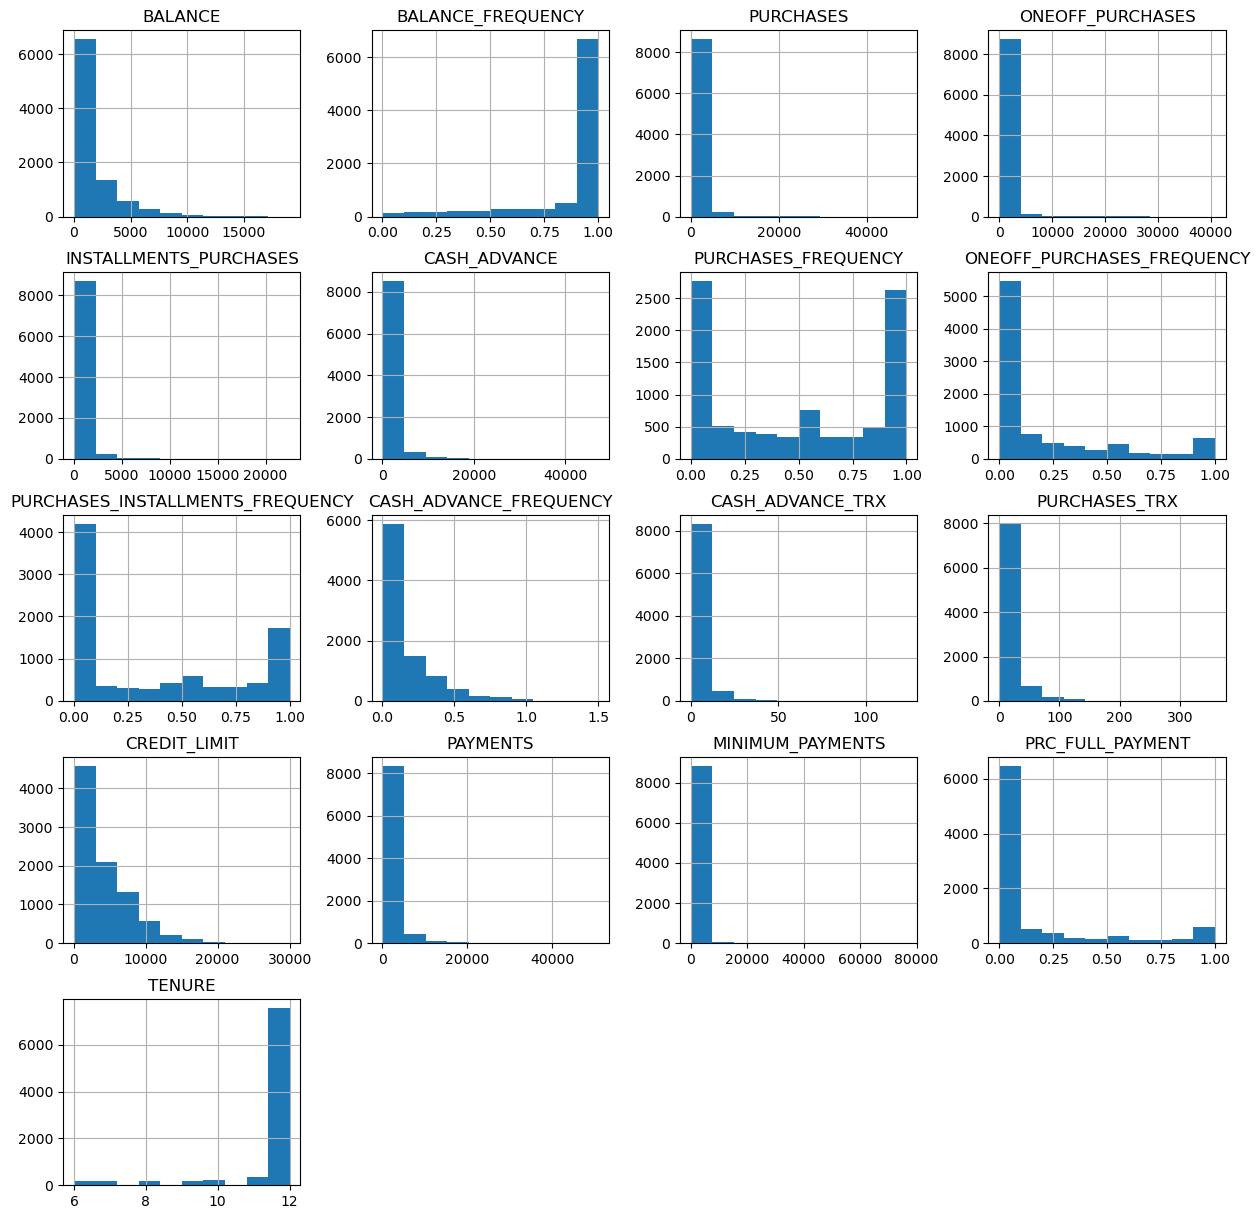

In [12]:
df.hist(figsize=(15,15))

In [19]:
df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000        864.206542          0.000000      12  
4   678.334763        244.791237          0.000000      12

## Optimum Küme Sayısının Belirlenmesi

### Elbow Yöntemi

In [20]:
ssd = []  # uzaklık farklarının karelerinin toplamı demek. 
K = range(1,30)

for k in K:
    kmeans = KMeans(n_clusters = k).fit(df)
    ssd.append(kmeans.inertia_)

Text(0.5, 1.0, 'Optimum küme sayısı için Elbow Yöntemi')

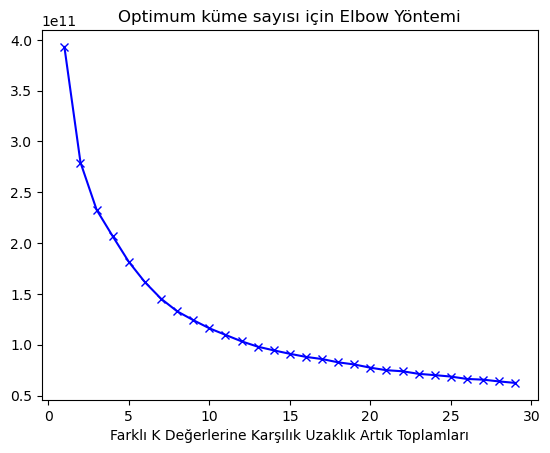

In [21]:
plt.plot(K, ssd, "bx-")
plt.xlabel("Farklı K Değerlerine Karşılık Uzaklık Artık Toplamları")
plt.title("Optimum küme sayısı için Elbow Yöntemi")

bu grafiğe bakarak optimum küme sayısı için 9,10,11 gibi değerleri kullanabiliriz.

### Yellowbrick Yöntemi:

In [23]:
!pip install yellowbrick

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 1.4 MB/s eta 0:00:00a 0:00:01


In [24]:
from yellowbrick.cluster import KElbowVisualizer

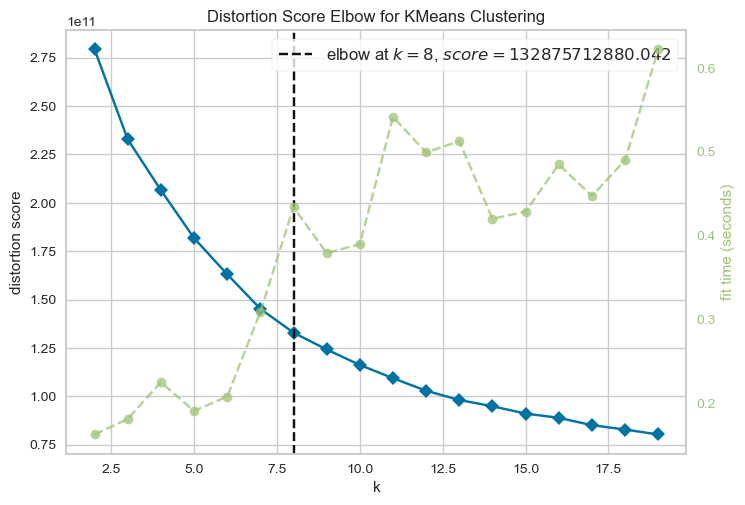

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,20))
visu.fit(df)
visu.poof()

In [98]:
kmeans = KMeans(n_clusters =8).fit(df)
kmeans

KMeans()

In [99]:
kumeler = kmeans.labels_

In [28]:
pd.DataFrame( {"CUST_ID": df.index, "Kumeler": kumeler})

CUST_ID  Kumeler
0           0        2
1           1        1
2           2        0
3           3        0
4           4        2
...       ...      ...
8945     8945        2
8946     8946        2
8947     8947        2
8948     8948        2
8949     8949        2

[8950 rows x 2 columns]

In [29]:
df["Kume_No"] = kumeler
df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Kume_No  
0      201.802084        139.509787          0.000000      12        2  
1     4103.032597       1072.340217          0.222222      12        1  
2      622.066742        627.284787          0.000000      12        0  
3        0.000000        864.206542          0.000000      12        0  
4      678.334763        244.791237          0.000000      12        2  
...           ...               ...               ...     ...      ...  
8945   325.594462         48.886365          0.500000       6        2  
89

In [31]:
df1 = df.copy()
df1

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Kume_No  
0      201.802084        139.509787          0.000000      12        2  
1     4103.032597       1072.340217          0.222222      12        1  
2      622.066742        627.284787          0.000000      12        0  
3        0.000000        864.206542          0.000000      12        0  
4      678.334763        244.791237          0.000000      12        2  
...           ...               ...               ...     ...      ...  
8945   325.594462         48.886365          0.500000       6        2  
89

In [32]:
df1 =df1.drop('Kume_No', axis=1)
df1

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000        864.206542          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365          0.500000       6  
8946   275.861322        864.206542          0.000000       6  
8947    81

## Temel Bileşen Analizi Yöntemi;

In [82]:
from sklearn.preprocessing import StandardScaler # önce standartlaştırmamız şart :)
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

In [34]:
df1 = StandardScaler().fit_transform(df1)

In [36]:
df1[0:5,0:5]     # 5 satır  5 gözlem görelim

array([[-0.73198937, -0.24943448, -0.42489974, -0.35693402, -0.34907882],
       [ 0.78696085,  0.13432467, -0.46955188, -0.35693402, -0.45457623],
       [ 0.44713513,  0.51808382, -0.10766823,  0.10888851, -0.45457623],
       [ 0.04909914, -1.01695278,  0.23205785,  0.54618946, -0.45457623],
       [-0.3587753 ,  0.51808382, -0.46206305, -0.34729428, -0.45457623]])

In [37]:
from sklearn.decomposition import PCA

In [70]:
pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df)

In [71]:
bilesen_df = pd.DataFrame(data = pca_fit, columns = ["birinci_bilesen","ikinci_bilesen"])

In [76]:
bilesen_df


birinci_bilesen  ikinci_bilesen
0        -4326.383926      921.566962
1         4118.916625    -2432.846299
2         1497.907534    -1997.579003
3         1394.548430    -1488.743783
4        -3743.351843      757.342754
...               ...             ...
8945     -4208.357907     1122.443347
8946     -4123.923969      951.683911
8947     -4379.444172      911.504640
8948     -4791.117712     1032.541037
8949     -3623.702718     1555.134824

[8950 rows x 2 columns]

In [77]:
pca.explained_variance_ratio_

array([0.47529108, 0.17778772])

* her bir bileşenin toplam varyans içindeki oranını ifade eder. Örneğin, birinci bileşenin açıkladığı varyansın oranı 

*  explained_variance_ratio_ [0] = 0.5 ise, birinci bileşen veri setinin toplam varyansının %50'sini açıklar demektir. Bir dizi olarak, toplam varyansın ne kadarının her bir bileşen tarafından açıklandığını gösterir.

In [78]:
pca.components_[1]

array([-3.00679720e-01, -4.25285570e-06,  5.00842222e-01,  3.80377576e-01,
        1.20504677e-01, -2.04398285e-01,  3.71026770e-05,  2.84330708e-05,
        3.02318087e-05, -1.93683852e-05, -5.03675204e-04,  3.51702450e-03,
       -4.47352854e-01,  4.70277893e-01, -1.90953211e-01,  2.57018516e-05,
        3.21101711e-06,  9.77896078e-05])

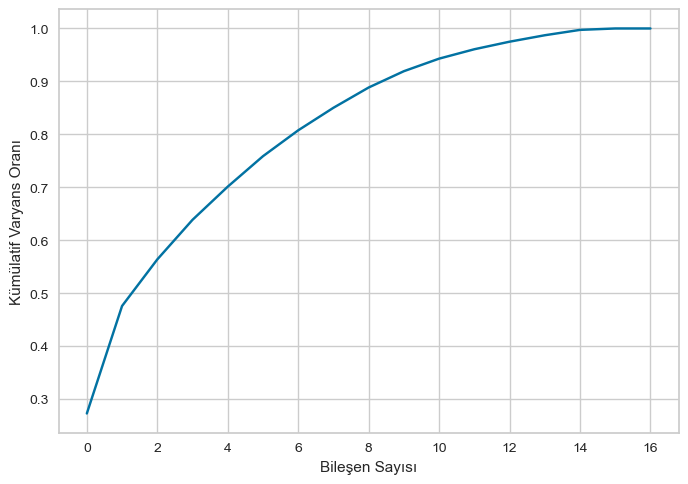

In [79]:
## Optimum bileşen sayısına karar vermek
pca = PCA().fit(df1)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Bileşen Sayısı")
plt.ylabel("Kümülatif Varyans Oranı");

* Optimum bileşen sayısı, toplam varyansın büyük bir yüzdesini koruyabilecek minimum bileşen sayısıdır.

* Örneğin, veri setinde 5 bileşen varsa ve ilk 3 bileşen toplam varyansın %90'ını açıklıyorsa, belki de bu 3 bileşeni seçmek yeterli olabilir. Grafikte, toplam varyansın hızlı bir şekilde arttığı ve ardından yavaşladığı nokta, genellikle optimum bileşen sayısı olarak kabul edilir.

In [80]:
# final model
pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df)

In [69]:
pca.explained_variance_ratio_ # optimum bileşen sayısı. 2 olarak belirlenir.

array([0.47529108, 0.17778772])

PCA yöntemine göre 2 küme yeterli olacakmış, eee şimdi napıcaz?

In [108]:
from sklearn.manifold import TSNE
import plotly.express as px

In [106]:
cluster_labels = kmeans.labels_


tsne = TSNE(
    n_components=3,
    random_state=42
)
tsne_result = tsne.fit_transform(df1)

In [105]:
tsne = TSNE(
    n_components=2,
    random_state=42
)
tsne_result_2d = tsne.fit_transform(df1)

In [109]:
tsne_3d_fig = px.scatter_3d(
    x = tsne_result[:, 0],
    y = tsne_result[:, 1],
    z = tsne_result[:, 2],
    color = cluster_labels,
    title = "t-SNE Kümelerin Gösterimi"
)
tsne_3d_fig.show()

In [110]:
tsne_2d_fig = px.scatter(
    x = tsne_result_2d[:, 0],
    y = tsne_result_2d[:, 1],
    color = cluster_labels,
    title = "t-SNE ' Boyutta Kümelerin Gösterimi'"
)
tsne_2d_fig.show()

## Silhouette Analiz Yöntemi

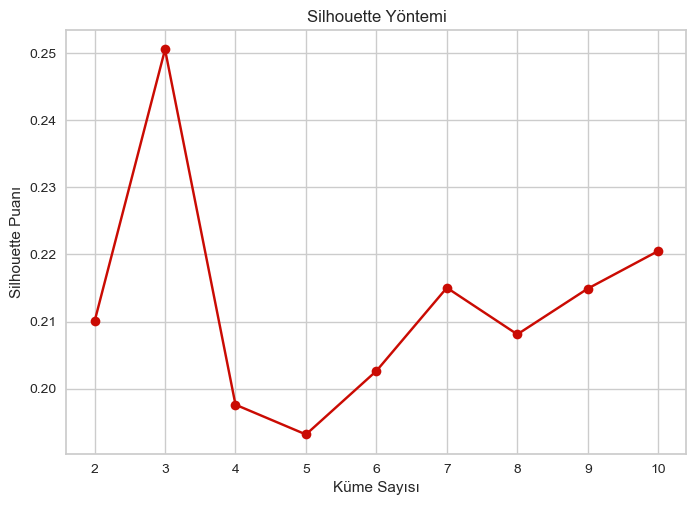

In [113]:
from sklearn.metrics import silhouette_samples

sil_list = []

for i in range(2, 11):
    model = KMeans(n_clusters=i, init='k-means++', random_state=42)
    sil_list.append(silhouette_samples(df1, model.fit_predict(df1)).mean())

plt.figure()
plt.plot(range(2, 11), sil_list, c='r', marker='o')
plt.title('Silhouette Yöntemi')
plt.xlabel('Küme Sayısı')
plt.ylabel('Silhouette Puanı')
plt.show()

haydaaa burada da optimum küme sayısnın 3 olacağı gözlemleniyor.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


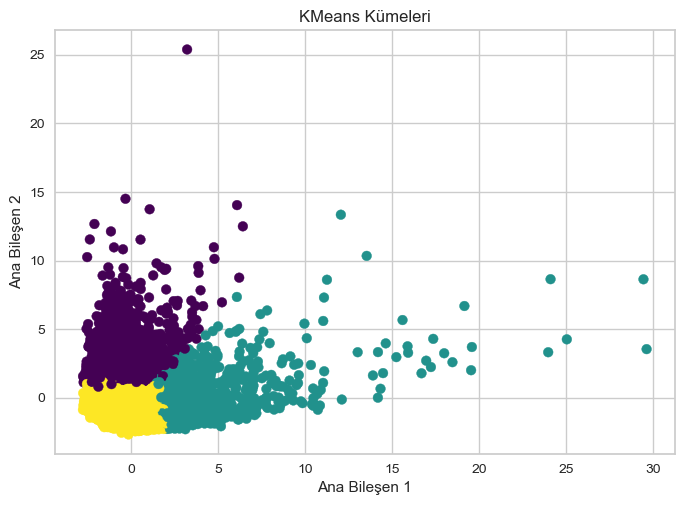

In [115]:
opt_model = KMeans(n_clusters=3, init='k-means++', random_state=42)
labels = opt_model.fit_predict(df1)

pca = PCA(n_components=2)
df_2d = pca.fit_transform(df1)

plt.figure()
plt.scatter(df_2d[:, 0], df_2d[:, 1], c=labels, cmap='viridis')
plt.title('KMeans Kümeleri')
plt.xlabel('Ana Bileşen 1')
plt.ylabel('Ana Bileşen 2')
plt.legend()
plt.show()